**Voting Classifier kya hota hai, kyu use karte hain, aur kaha use karte hain** – ye sab kuch samjhte hain!

### **Voting Classifier ka Basic Concept**
Voting classifier ek **ensemble learning technique** hai jo multiple models ko combine kar ke aik single strong model banata hai. Iska core idea yeh hai ke aap aik hi problem ke liye multiple algorithms ya models use karte hain, aur inke results ko combine kar ke aik final prediction nikaalte hain.

### **Kyu Use Karte Hain?**
Kabhi kabhi aik single model (jaise ke sirf decision tree ya sirf logistic regression) apne aap mein best nahi hota, ya to wo overfit kar jata hai ya underfit. Voting classifier use kar ke hum alag alag models ke strengths ko combine karte hain, jo result ko **zyada reliable aur accurate** banata hai. Yeh aik tarah se different models ke strengths ko balance karne ka tareeqa hai.

### **Types of Voting Classifiers**
Voting classifiers do tarah ke hote hain:

1. **Hard Voting**:
   - Isme har model aik **class prediction** deta hai, aur jo class majority models ne predict ki hoti hai, wo final prediction ban jaati hai. 
   - Example ke taur pe, agar aapke paas 3 models hain aur inme se 2 models “Class A” predict karte hain aur aik “Class B”, to final prediction “Class A” hogi.
   
2. **Soft Voting**:
   - Isme har model class ke **probabilities** predict karta hai, aur phir un probabilities ka average liya jata hai. Jo class highest average probability rakhti hai, wo final prediction ban jaati hai.
   - Yeh approach tab best hoti hai jab models apne probabilities bhi sahi estimate karte hain.

### **Kaha Use Karte Hain?**
Voting classifier un situations mein useful hota hai jab:

- **Classification problems** ho, jahan multiple classes ho sakti hain, jaise fraud detection, email spam detection, disease classification.
- Jab **multiple algorithms** ka combination use karke aik better prediction chahiye ho, jese ke logistic regression, random forest, aur SVM ka combination.
- Jab **model stability aur accuracy** ko improve karna ho aur alag alag models ke advantages ka faida lena ho.

### **Example:**
Agar aapko decide karna hai ke aik email spam hai ya nahi, to aap logistic regression, decision tree, aur k-nearest neighbors (KNN) ka combination bana sakte hain:

- Logistic regression ko data ke linear relationships capture karne mein acha maana jata hai.
- Decision tree non-linear relationships capture kar sakta hai.
- KNN simple instance-based learning karta hai jo data ke similarity ko capture karta hai.

Is case mein, in tino models ko use kar ke hard voting ya soft voting ke through aik **final decision** liya jata hai ke email spam hai ya nahi.


Is tarah se Voting Classifier alag alag models ke predictions ko **combine** karta hai aur aik final output deta hai jo ziada **robust** hota hai.

### **Benefits of Voting Classifier**:
- **Increases Accuracy**: Alag alag models ko mila ke final prediction ziada accurate ban jata hai.
- **Reduces Overfitting**: Hard voting ke through, ye overfitting se bhi bachata hai kyunki sirf aik model pe depend nahi hota.
- **Diverse Models ke Advantages**: Different types ke models ke advantages ko combine karta hai, jo aik single model me nahi milte.

### **When to Use Voting Classifier**:
- Jab multiple models ke outcomes ko combine kar ke ziada reliable result chahiye ho.
- Jab aapke pass classification task ho aur alag alag classifiers available hon.
- Jab individual models se sahi result nahi mil raha aur ensemble approach se improvement ho sakta ho.

I hope ye explanation aapko **Voting Classifier** samajhne mein madadgar hogi! 🧠

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [30]:
df = pd.read_csv('./IRIS.csv')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# remove Id col
df = df.iloc[:,1:]

In [33]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [34]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()

In [36]:
df['species'] = encoder.fit_transform(df['species'])

In [37]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


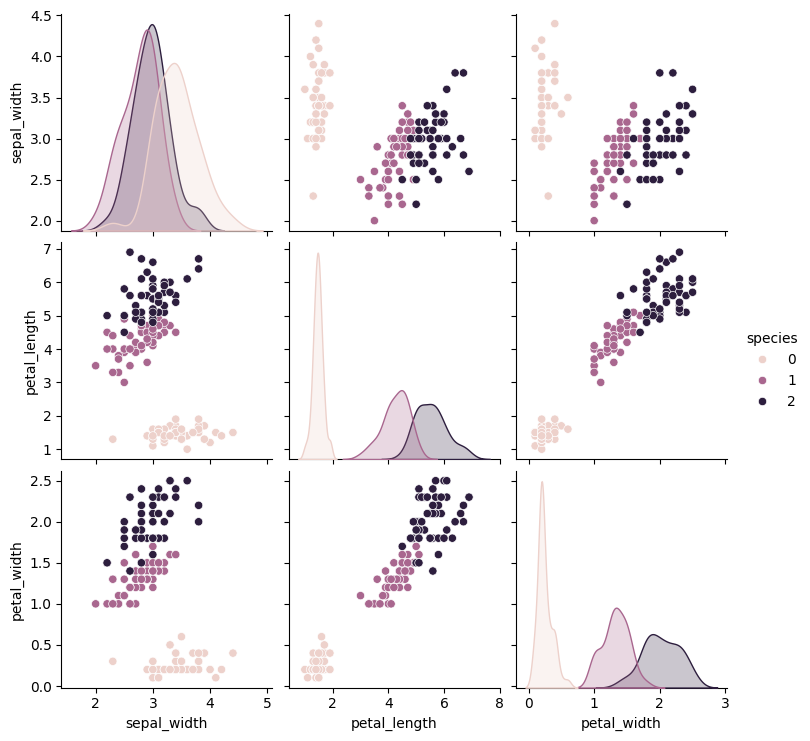

In [40]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [46]:
new_df = df[df['species'] != 0][['petal_length','sepal_width','species']]

In [47]:
new_df.head()

,petal_length,sepal_width,species
50,4.7,3.2,1
51,4.5,3.2,1
52,4.9,3.1,1
53,4.0,2.3,1
54,4.6,2.8,1


In [48]:
new_df.shape

(100, 3)

In [49]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [51]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [53]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [54]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.95
rf 0.95
knn 0.95


In [55]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [21]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


## Soft Voting

In [22]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


## Weighted Voting

In [23]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.74
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.74
for i=1,j=2,k=2 0.74
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.74
for i=2,j=1,k=1 0.79
for i=2,j=1,k=2 0.75
for i=2,j=1,k=3 0.75
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.73
for i=2,j=3,k=1 0.73
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.77
for i=3,j=2,k=1 0.79
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.75


## Classifiers of Same Algo

In [ ]:
from sklearn.svm import SVC

In [24]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

NameError: name 'SVC' is not defined

In [39]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
